In [1]:
# Importing libraries
import numpy as np
import pandas as pd
from numpy import *
import matplotlib
import matplotlib.pyplot as plt

# Plot settings
plt.style.use('ggplot')
matplotlib.rcParams['figure.figsize'] = [12.0, 8.0]
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['lines.linewidth'] = 2.0

# Set max row to 300
pd.set_option('display.max_rows', 300)

In [9]:
def simulate_path(s0, mu, sigma, horizon, timesteps, n_sims):

    # Set the random seed for reproducibility
    # Same seed leads to the same set of random values
    random.seed(1000)

    # Read parameters
    S0 = s0         # initial spot level
    r = mu          # mu = rf in risk neutral framework
    T = horizon     # time horizion
    t = timesteps   # number of time steps
    n = n_sims      # number of simulation

    # Define dt
    dt = T/t        # length of time interval

    # Simulating 'n' asset price paths with 't' timesteps
    S = zeros((t, n))
    S[0] = S0

    for i in range(0, t-1):
        w = random.standard_normal(n)                                                        # psuedo random numbers
        # S[i+1] = S[i] * (1 + r * dt + sigma * sqrt(dt) * w)                                  # vectorized operation per timesteps
        S[i+1] = S[i] * exp((r - 0.5 * sigma ** 2) * dt + sigma * sqrt(dt) * w)            # alternate form

    return S

In [90]:
T = 1
N = 252
dt = 1/(N+1)


def brownian(N):
    W =
    sqrt_dt = sqrt(1/N)
    norm_arr = random.normal(0,1, )*sqrt_dt
    wt = cumsum(norm_arr)
    return wt

Bt = brownian(N)
t = arange(0,1,dt)
S = zeros(N+1)


In [92]:
Bt.shape


(2520000,)

In [51]:
price_path = pd.DataFrame(simulate_path(100, 0.05, 0.2, 1, 252, 100000))

<AxesSubplot:>

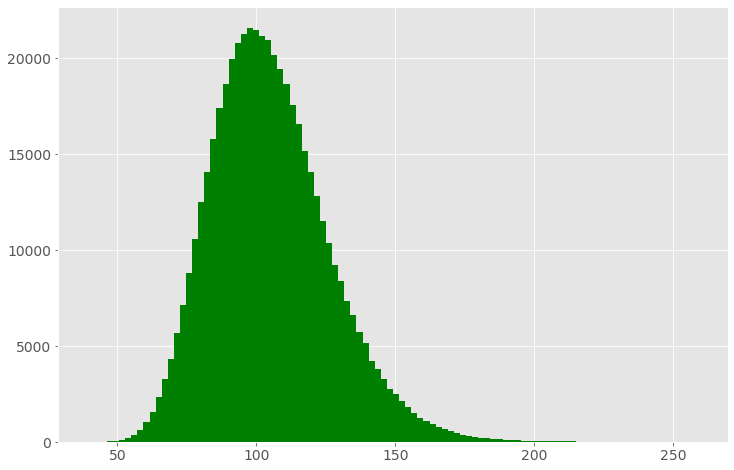

In [42]:
price_path.iloc[-1].hist(bins=100, color='green')

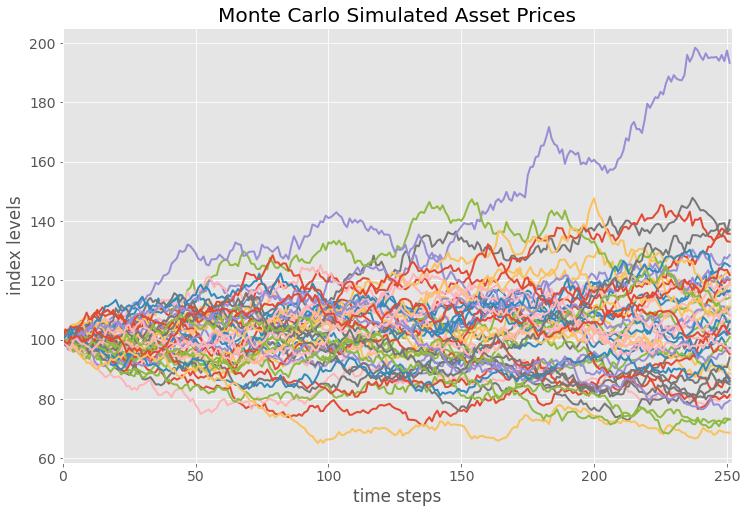

In [43]:
# Plot initial 100 simulated path using matplotlib
plt.plot(price_path.iloc[:,:50])
plt.xlabel('time steps')
plt.xlim(0,252)
plt.ylabel('index levels')
plt.title('Monte Carlo Simulated Asset Prices');

In [66]:
def asian_payoff(price_paths, K, option_type = 'call'):
    s_ave = average(price_paths, 0)
    if option_type == 'put':
        payoff = maximum( K - s_ave, 0)
    elif option_type == 'call':
        payoff = maximum(s_ave - K, 0)
    else:
        print('Invalid option type')
        return 0
    return  payoff

def lookback_payoff(price_paths, option_type = 'call'):
    s_max = amax(price_paths)
    s_min = amin(price_paths)
    if option_type == 'put':
        payoff = maximum( s_max - price_paths.iloc[-1], 0)
    elif option_type == 'call':
        payoff = maximum(price_paths.iloc[-1] - s_min, 0)
    else:
        print('Invalid option type')
        return 0
    return  payoff

In [67]:
asian_call = exp(-0.05*1)*mean(asian_payoff(price_path,100))
asian_put = exp(-0.05*1)*mean(asian_payoff(price_path,100,'put'))

# Print the values
print(f'Asian Call Option Value: {asian_call:0.4f}')
print(f'Asian Put Option Value: {asian_put:0.4f}')

Asian Call Option Value: 5.7530
Asian Put Option Value: 3.3301


In [68]:
lookback_call = exp(-0.05*1)*mean(lookback_payoff(price_path))
lookback_put = exp(-0.05*1)*mean(lookback_payoff(price_path,'put'))

# Print the values
print(f'Lookback Call Option Value: {lookback_call:0.4f}')
print(f'Lookback Put Option Value: {lookback_put:0.4f}')

Lookback Call Option Value: 16.5842
Lookback Put Option Value: 13.4193
